DATA 643 Project 1:

Angus, Pavan, Nathan

We built a simple recommender system for American TV sit-coms. This system will take user input for a sit com and predict the user's preference for possible unwatched sitcoms. This is similar in approach to systems used by Netflix, Hulu and Amazon Prime.

We used Facebook to collect data on 5 popular American TV sitcoms: The Big Bang Theory,	Brooklyn 99, It's Always Sunny in Philadelphia,	The Goldbergs, and The Unbreakable Kimmy Schmidt. Facebook friends were asked to rate these shows from 1 for 'Awful' to 5 for 'Outstanding' and to leave blank un-watched shows using a Google Docs Quiz. The data from the Google We will in turn use these data to generate a basic recommendation system for a test set of withheld data and unwatched shows. 

In [1]:
#import desired packages here:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
tv_df = pd.read_csv('https://raw.githubusercontent.com/ncooper76/MSDA/master/TV_Show_Preferences.csv')
tv_df = tv_df.drop(columns=["Timestamp"])
tv_df = tv_df[sorted(tv_df.columns)]
tv_df.head(6)

,Brooklyn 99,It's Always Sunny in Philadelphia,The Big Bang Theory,The Goldbergs,Unbreakable Kimmy Schmidt
0,5.0,NaN,1.0,2.0,3.0
1,2.0,3.0,3.0,2.0,1.0
2,NaN,NaN,4.0,NaN,NaN
3,4.0,NaN,1.0,3.0,5.0
4,NaN,2.0,2.0,NaN,3.0
5,3.0,NaN,1.0,3.0,4.0


Below scatter plot shows the distribution of ratings each show had received. A different color represents a different show.
The blue color is for "The Big Bang Theory", the yellow color is for "Brooklyn 99", the red color is for "It's always sunny in Philadaphia" ,and so.

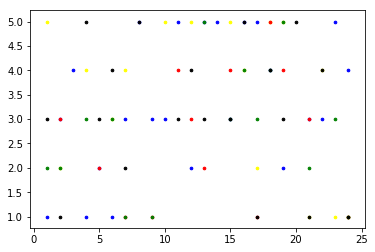

In [3]:
# Add Data visualization of the dataset

tv3 = tv_df
tv3.insert(0, "New_ID", range(1, 1+len(tv3)))
ta = tv3.New_ID.values
t1 = tv3['The Big Bang Theory'].values
t2 = tv3['Brooklyn 99'].values
t3 = tv3["It's Always Sunny in Philadelphia"].values
t4 = tv3['The Goldbergs'].values
t5 = tv3['Unbreakable Kimmy Schmidt'].values
plt.scatter(ta,t1, c = 'blue', s = 7)
plt.scatter(ta,t2, c = 'yellow', s = 7)
plt.scatter(ta,t3, c ='red', s = 7)
plt.scatter(ta,t4, c = 'green', s = 7)
plt.scatter(ta,t5, c = 'black', s = 7)
plt.show()

In [4]:
tv_df = tv_df.drop(columns=["New_ID"])
tv_df_mean = tv_df.stack().mean(skipna = True) #stack makes the DF one column, mean takes the mean of that colunm.
print(tv_df_mean) # 3.1279... agrees with the average taken in Google Sheets
#below are the means for the rows and the columns of the dataframe
tv_df_col_means = tv_df.mean(axis=0,skipna = True)
tv_df_row_means = tv_df.mean(axis=1,skipna = True)
print(tv_df_col_means)
print(tv_df_row_means[:6])

3.127906976744186
Brooklyn 99                          3.500000
It's Always Sunny in Philadelphia    2.615385
The Big Bang Theory                  3.347826
The Goldbergs                        2.800000
Unbreakable Kimmy Schmidt            3.157895
dtype: float64
0    2.750000
1    2.200000
2    4.000000
3    3.250000
4    2.333333
5    2.750000
dtype: float64


Now we will break into training and test sets and calculate the raw averages:

In [5]:
from sklearn.model_selection import train_test_split
tv_col_df = tv_df.stack()
tv_col_df.head(20)

tv_train, tv_test = train_test_split(tv_col_df, test_size =0.2, random_state=42)
tv_train = tv_train.sort_index()
tv_test = tv_test.sort_index()
#print(tv_train.head())
#print(tv_test.head())
train_raw_ave = tv_train.mean()
test_raw_ave = tv_test.mean()
print("The Raw Average on the Training Set is: " + str(train_raw_ave) + "\n")
print("The Raw Average on the Test Set is: " + str(test_raw_ave) + "\n")

The Raw Average on the Training Set is: 3.1029411764705883

The Raw Average on the Test Set is: 3.2222222222222223



Now we recast the data frames into their original wide format and calculate the row and column averages to calculate the biases:

In [6]:
tv_train_wide = tv_train.unstack().sort_index()
tv_train_col_means = tv_train_wide.mean(axis=0,skipna = True)
print(str(tv_train_col_means))
tv_train_row_means = tv_train_wide.mean(axis=1,skipna = True)
print(str(tv_train_row_means[:6]))

Brooklyn 99                          3.777778
It's Always Sunny in Philadelphia    2.636364
The Big Bang Theory                  3.421053
The Goldbergs                        2.545455
Unbreakable Kimmy Schmidt            3.055556
dtype: float64
0    2.000000
1    2.250000
2    4.000000
3    3.000000
4    2.333333
5    3.333333
dtype: float64


In [7]:
tv_test_wide = tv_test.unstack().sort_index()
tv_test_wide
tv_test_col_means = tv_test_wide.mean(axis=0,skipna = True)
print(str(tv_test_col_means))
tv_test_row_means = tv_test_wide.mean(axis=1,skipna = True)
print(str(tv_test_row_means[:6]))

Brooklyn 99                          3.142857
It's Always Sunny in Philadelphia    2.500000
The Big Bang Theory                  3.000000
The Goldbergs                        3.500000
Unbreakable Kimmy Schmidt            5.000000
dtype: float64
0     5.0
1     2.0
3     3.5
5     1.0
6     1.0
10    4.0
dtype: float64


Now we can calculate the RMSE for the raw averages:

In [8]:
from sklearn.metrics import mean_squared_error

train_pred = [tv_train.mean()]*len(tv_train)# we need a list of raw averages the same length as the stacked df
train_pred
train_rmse = mean_squared_error(tv_train, train_pred)**0.5
print("RMSE on the Training Set is: " + str(train_rmse) + "\n")
test_pred = [tv_train.mean()]*len(tv_test) # we need a list of raw averages the same length as the stacked df
test_pred
test_rmse = mean_squared_error(tv_test, test_pred)**0.5
print("RMSE on the Test Set is: " + str(test_rmse) + "\n")

RMSE on the Training Set is: 1.3841508958282494

RMSE on the Test Set is: 1.5521886793398105



Now we will use the row (user) and colunm (item) means to calculate bias, and use those biases to make better predictions for every user-item pair.

In [9]:
show_bias = tv_train_col_means - train_raw_ave 
print(show_bias)
user_bias = tv_train_row_means - train_raw_ave 
print(user_bias[:6]) 
tv_pred = pd.DataFrame(index=tv_df.index, columns=tv_df.columns.values)
for i in range(0,len(user_bias)):
    for j in range(0,len(show_bias)):
            tv_pred.iloc[i,j] = train_raw_ave + user_bias[i] + show_bias[j]
            if tv_pred.iloc[i,j] < 1.0:
                tv_pred.iloc[i,j] = 1.0
            elif tv_pred.iloc[i,j] > 5.0:
                tv_pred.iloc[i,j] = 5.0
tv_pred.head(6)

Brooklyn 99                          0.674837
It's Always Sunny in Philadelphia   -0.466578
The Big Bang Theory                  0.318111
The Goldbergs                       -0.557487
Unbreakable Kimmy Schmidt           -0.047386
dtype: float64
0   -1.102941
1   -0.852941
2    0.897059
3   -0.102941
4   -0.769608
5    0.230392
dtype: float64


,Brooklyn 99,It's Always Sunny in Philadelphia,The Big Bang Theory,The Goldbergs,Unbreakable Kimmy Schmidt
0,2.67484,1.53342,2.31811,1.44251,1.95261
1,2.92484,1.78342,2.56811,1.69251,2.20261
2,4.67484,3.53342,4.31811,3.44251,3.95261
3,3.67484,2.53342,3.31811,2.44251,2.95261
4,3.00817,1.86676,2.65144,1.77585,2.28595
5,4.00817,2.86676,3.65144,2.77585,3.28595


In [10]:
import math
tv_pred_train = pd.DataFrame(index=tv_df.index, columns=tv_df.columns.values)
tv_pred_train = tv_pred_train[sorted(tv_pred_train.columns)]
tv_train_wide = tv_train_wide[sorted(tv_train_wide.columns)]
for i in range(0,len(user_bias)):
    for j in range(0,len(show_bias)):
        if math.isnan(tv_train_wide.iloc[i,j]):
            continue
        else:
            tv_pred_train.iloc[i,j] = train_raw_ave + user_bias[i] + show_bias[j]
            if tv_pred_train.iloc[i,j] < 1.0:
                tv_pred_train.iloc[i,j] = 1.0
            elif tv_pred_train.iloc[i,j] > 5.0:
                tv_pred_train.iloc[i,j] = 5.0
tv_pred_train.head(6)

,Brooklyn 99,It's Always Sunny in Philadelphia,The Big Bang Theory,The Goldbergs,Unbreakable Kimmy Schmidt
0,NaN,NaN,2.31811,1.44251,1.95261
1,NaN,1.78342,2.56811,1.69251,2.20261
2,NaN,NaN,4.31811,NaN,NaN
3,NaN,NaN,3.31811,NaN,2.95261
4,NaN,1.86676,2.65144,NaN,2.28595
5,4.00817,NaN,NaN,2.77585,3.28595


In [11]:
train_bias_rmse = mean_squared_error(tv_train, tv_pred_train.stack().sort_index())**0.5
print("RMSE on the Training Set is: " + str(train_bias_rmse) + "\n")

RMSE on the Training Set is: 0.907301749900152



In [12]:
tv_pred_test = pd.DataFrame(index=tv_df.index, columns=tv_df.columns.values)
tv_pred_test = tv_pred_test[sorted(tv_pred_test.columns)]
tv_test_wide = tv_test_wide[sorted(tv_test_wide.columns)]
tv_test_wide = tv_test_wide.reindex(tv_df.index)
for l in range(0,len(user_bias)):
    for k in range(0,len(show_bias)):
        if math.isnan(tv_test_wide.iloc[l,k]):
            continue
        else:
            tv_pred_test.iloc[l,k] = test_raw_ave + user_bias[l] + show_bias[k]
            if tv_pred_test.iloc[l,k] < 1.0:
                tv_pred_test.iloc[l,k] = 1.0
            elif tv_pred_test.iloc[l,k] > 5.0:
                tv_pred_test.iloc[l,k] = 5.0
tv_pred_test.head(6)

,Brooklyn 99,It's Always Sunny in Philadelphia,The Big Bang Theory,The Goldbergs,Unbreakable Kimmy Schmidt
0,2.79412,NaN,NaN,NaN,NaN
1,3.04412,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,3.79412,NaN,NaN,2.56179,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3.77073,NaN,NaN


In [13]:
test_bias_rmse = mean_squared_error(tv_test, tv_pred_test.stack().sort_index())**0.5
print("RMSE on the Test Set is: " + str(test_bias_rmse) + "\n")

RMSE on the Test Set is: 1.6941199070759048



Notice that relative to the training set including the biases in the prediction improved RMSE from 1.384 to 0.907. However for the test set RMSE actually went up from 1.552 to 1.694. This is due to the small amount of data in the set 120 user-items total, so the training set is 96 user-items and the test set is 24 user-items.  

For example, user 0 had Brooklyn 99 assigned to the test set that took the users average rating from a 2.75 to a 2.00. This reduces the user bias by -0.75 from a  -0.353 to -1.103, and this greatly reduces the values of the predicted ratings. Had Unbreakable Kimmy Schmidt been selected for the test set, user 0's average would have gone from 2.75 to 2.67, and bias would go from -0.353 to -0.463.

Had the data set been hundreds of ratings from thousands of options the changes the differences in the averages and baises would be less extreme and we would expect that the RMSE on the test set to show similar behavior to the training set in this case.